In [33]:
# Import Reuirements
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [34]:
from numpy.random import seed
seed(1)           # Seeding enables reproducability of result
nb_classes = 10
nb_epoch = 10
batch_size = 256
hidden_layer1 = 128
hidden_layer2 = 64
hidden_layer3 = 10 # because you have 10 categories

In [35]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('Train samples: {}'.format(x_train.shape[0]))
print('Test samples: {}'.format(x_test.shape[0]))

11493376/11490434 [==============================] - 1s 0us/step
Train samples: 60000
Test samples: 10000


In [36]:

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

# How to input your own custom mathematical activation functions

In [37]:
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.generic_utils import get_custom_objects
import tensorflow as tf
import math

# Swish activation function was invented by google brain
def swish(x):
    return (K.sigmoid(x) * x)

## NN with default available activation functions


In [40]:
input_img = Input(shape=(784,))
encoded = Dense(hidden_layer1, activation='relu')(input_img)
encoded = Dense(hidden_layer2, activation='relu')(encoded)
encoded = Dense(hidden_layer3, activation='softmax')(encoded)
decoded = Dense(hidden_layer2, activation='relu')(encoded)
decoded = Dense(hidden_layer1, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [41]:
model = Model(input=input_img, output=encoded)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [42]:
history=model.fit(x_train, y_train,
          nb_epoch=nb_epoch,
          batch_size=batch_size,
          shuffle=True,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0679 - accuracy: 0.9769 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0256 - val_accuracy: 0.9919
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0196 - val_accuracy: 0.9935
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0189 - val_accuracy: 0.9937
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0170 - val_accuracy: 0.9942
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0167 - val_accuracy: 0.9944
Epoch 7/10
60000/60000 [==============================] - 2s 26us/st

In [49]:
print(history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [53]:
# Detailed model performance after every epoch, 10 values as 10 epochs used
history.history

{'accuracy': [0.9768549,
  0.99041635,
  0.99327195,
  0.99469846,
  0.99570805,
  0.9966402,
  0.9971967,
  0.9976863,
  0.997895,
  0.99825656],
 'loss': [0.06785796911120415,
  0.029413117388884226,
  0.02077370287925005,
  0.016294399454693,
  0.013153321537623802,
  0.010494224242369335,
  0.008853799020002285,
  0.00742118222763141,
  0.006431146345411738,
  0.0056151556375126045],
 'val_accuracy': [0.9895800948143005,
  0.991890013217926,
  0.9935398697853088,
  0.993690013885498,
  0.9942099452018738,
  0.9943699240684509,
  0.9948400259017944,
  0.9953100681304932,
  0.9950999021530151,
  0.9952400326728821],
 'val_loss': [0.03279122709482908,
  0.025610695653781296,
  0.019574378670938312,
  0.018864779736148193,
  0.01702302118688822,
  0.016657777815591544,
  0.015268698211561424,
  0.015100009548122762,
  0.014888028289086652,
  0.01458966584832815]}

In [50]:
print('Test accuracy :', score[1])
# similarly other metrics can be calculated

Test accuracy : 0.9952396750450134


## NN with custom used activation functions

-> you can try your own custom functions and see how the model performance changes


In [54]:
input_img = Input(shape=(784,))
encoded = Dense(hidden_layer1, activation=swish)(input_img)
encoded = Dense(hidden_layer2, activation=swish)(encoded)
encoded = Dense(hidden_layer3, activation='softmax')(encoded)
decoded = Dense(hidden_layer2, activation=swish)(encoded)
decoded = Dense(hidden_layer1, activation=swish)(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [55]:
model = Model(input=input_img, output=encoded)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [56]:
history=model.fit(x_train, y_train,
          nb_epoch=nb_epoch,
          batch_size=batch_size,
          shuffle=True,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0690 - accuracy: 0.9763 - val_loss: 0.0361 - val_accuracy: 0.9880
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.0258 - val_accuracy: 0.9914
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0208 - val_accuracy: 0.9931
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0177 - val_accuracy: 0.9941
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0178 - val_accuracy: 0.9939
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0152 - val_accuracy: 0.9948
Epoch 7/10
60000/60000 [==============================] - 2s 26us/st

In [57]:
print('Test accuracy :', score[1])


Test accuracy : 0.995589554309845


In [58]:
# Accuracy increased on using a better activation function

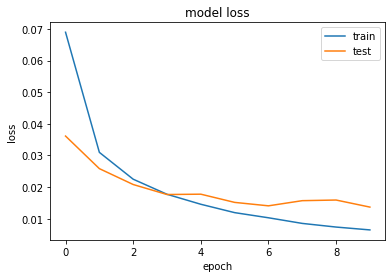

In [59]:
# summarize history for loss
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


from google.colab import files
# plt.savefig("swish_loss.png")
# files.download("swish_loss.png") 


plt.show()

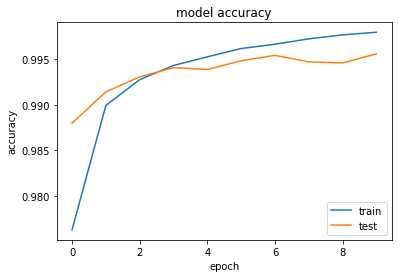

In [62]:
# summarize history for accuracy
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


# from google.colab import files
# plt.savefig("eswish_accuracy.png")
# files.download("eswish_accuracy.png") 


plt.show()